Develop a project to analyze the reviews given by customers for any particular restaurant/hotel given by swiggy/zomato.

In [ ]:
pip install pandas scikit-learn nltk matplotlib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sentiment Analysis for 'Mayuri Inn':

Review: Staff was rude and unhelpful.
Predicted Sentiment: negative

Review: Beautiful ambiance and great hospitality.
Predicted Sentiment: positive

Review: Very poor hygiene and unclean bathrooms.
Predicted Sentiment: negative

Review: Not worth the money, very disappointing.
Predicted Sentiment: negative

Review: Excellent service and very clean rooms.
Predicted Sentiment: positive

Review: Clean rooms and quick room service.
Predicted Sentiment: positive

Review: The food quality was terrible.
Predicted Sentiment: negative

Review: Very poor hygiene and unclean bathrooms.
Predicted Sentiment: negative

Review: Had to ask multiple times for basic amenities.
Predicted Sentiment: negative

Review: Overpriced for the service offered.
Predicted Sentiment: negative

Review: Check-in process was very slow.
Predicted Sentiment: negative

Review: The food quality was terrible.
Predicted Sentiment: negative

Review: Beautiful ambiance and great hospital

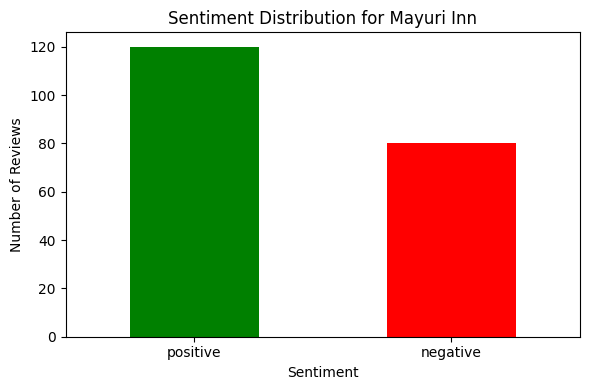

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')

df = pd.read_csv("Mayuri_Inn_Reviews_Reordered.csv")

hotel_name = "Mayuri Inn"
hotel_data = df[df['restaurant_name'].str.lower() == hotel_name.lower()].copy()

if hotel_data.empty:
    print(f"No reviews found for '{hotel_name}'")
    exit()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
    return text

hotel_data["cleaned_review"] = hotel_data["review_text"].astype(str).apply(clean_text)

hotel_data["sentiment"] = hotel_data["rating"].apply(lambda x: "positive" if x >= 4 else "negative")

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(hotel_data["cleaned_review"])
y = hotel_data["sentiment"]

model = MultinomialNB()
model.fit(X, y)

hotel_data["predicted_sentiment"] = model.predict(X)

print(f"\nSentiment Analysis for '{hotel_name}':\n")
for i, row in hotel_data.iterrows():
    print(f"Review: {row['review_text']}")
    print(f"Predicted Sentiment: {row['predicted_sentiment']}\n")

positive_count = (hotel_data["predicted_sentiment"] == "positive").sum()
total = len(hotel_data)
average_rating = hotel_data["rating"].mean()

print(f"Summary for '{hotel_name}':")
print(f" - Total Reviews: {total}")
print(f" - Positive Reviews: {positive_count} ({(positive_count/total)*100:.1f}%)")
print(f" - Average Rating: {average_rating:.2f}")

plt.figure(figsize=(6, 4))
hotel_data["predicted_sentiment"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title(f"Sentiment Distribution for {hotel_name}")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
